In [60]:
import spot
import puns
from formula_sampler import *
from collections import defaultdict
import networkx as nx

In [30]:
formula = sample_formula()

In [31]:
formula

'(( F store) & ( F cafe) & ( F bank))'

In [32]:
aut = spot.translate(formula)

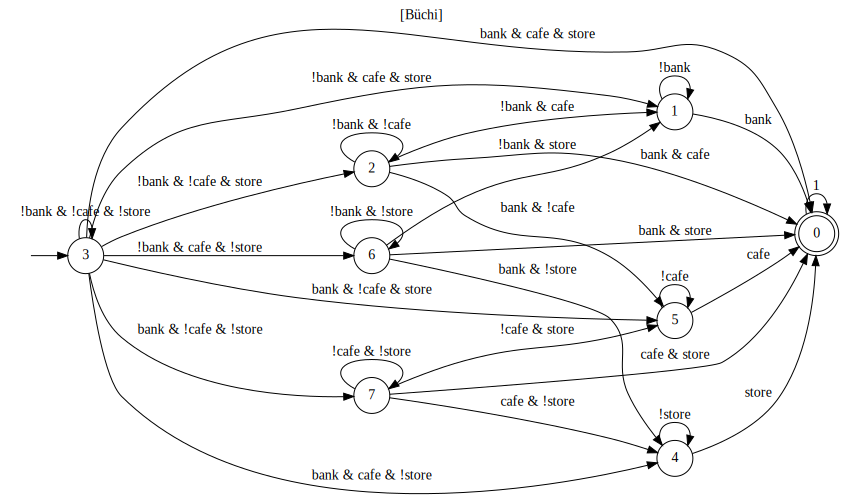

In [33]:
aut

In [43]:
aut.out(0)

<spot.impl.twa_graph_state_out; proxy of <Swig Object of type 'spot::internal::state_out< spot::digraph< spot::twa_graph_state,spot::twa_graph_edge_data > > *' at 0x7f54741a5c90> >

In [54]:
bdd = aut.get_dict()
for e in aut.out(3):
    print(spot.bdd_format_formula(bdd,e.cond))
    print(e.dst)

bank & cafe & store
0
!bank & cafe & store
1
!bank & !cafe & store
2
!bank & !cafe & !store
3
bank & cafe & !store
4
bank & !cafe & store
5
!bank & cafe & !store
6
bank & !cafe & !store
7


In [62]:
aut = spot.translate(formula, 'BA','complete')
bdd = aut.get_dict()
trans_dict = defaultdict(dict)
for state in range(aut.num_states()):
    for edge in aut.out(state):
        transition_formula = spot.bdd_format_formula(bdd, edge.cond)
        trans_dict[state][transition_formula] = edge.dst

nodelist = defaultdict(dict)
for state in range(aut.num_states()):
    for (edge_formula, next_state) in trans_dict[state].items():
        nodelist[state][next_state] = edge_formula

dfa = nx.DiGraph(nodelist)

OutEdgeView([(0, 0), (1, 0), (1, 1), (2, 0), (2, 1), (2, 2), (2, 5), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 0), (4, 4), (5, 0), (5, 5), (6, 0), (6, 1), (6, 4), (6, 6), (7, 0), (7, 4), (7, 5), (7, 7)])